In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [ ]:
#Fetching Average Pooling Dataset

import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/pooled_data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files
sample = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data
        print(f"Processing file: {filename}")

        sample.append(data)

In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=15, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics (e.g., accuracy)

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#Scaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)



In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(180, 20, 19799)
(12, 20, 19799)
(48, 20, 19799)


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(180, 5)
(48, 5)
(12, 5)


In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),  # RNN layer with 8 units
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])



In [ ]:
model2 = tf.keras.models.Sequential([

    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])


In [ ]:
optimizer = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
optimizer = optimizers.Adam()
model2.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20, 128)           2534400   
                                                                 
 batch_normalization (Batch  (None, 20, 128)           512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 12805     
                                                                 
Total params: 2547717 (9.72 MB)
Trainable params: 2547461 (9.72 MB)
Non-trainable params: 256 (1.00 KB)
__________________

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20, 128)           2534400   
                                                                 
 batch_normalization_1 (Bat  (None, 20, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 20, 128)           0         
                                                                 
 dense_3 (Dense)             (None, 20, 128)           16512     
                                                                 
 batch_normalization_2 (Bat  (None, 20, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 20, 128)          

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:
tf.keras.utils.plot_model(model2,show_shapes = True, to_file='model.png')

In [ ]:
y_val_fold

array(['Happy', 'Happy', 'Neutral', 'Disgust', 'Fear', 'Fear', 'Neutral',
       'Sad', 'Fear', 'Sad', 'Neutral', 'Happy', 'Sad', 'Fear', 'Sad',
       'Happy', 'Fear', 'Happy', 'Sad', 'Neutral', 'Happy', 'Neutral',
       'Sad', 'Sad', 'Sad', 'Sad', 'Disgust', 'Disgust', 'Disgust', 'Sad',
       'Sad', 'Neutral', 'Fear', 'Disgust', 'Happy', 'Sad', 'Disgust',
       'Neutral'], dtype='<U7')

In [ ]:
checkpoint = callbacks.ModelCheckpoint('RNN_poolmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
checkpoint = callbacks.ModelCheckpoint('RNN _poolmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list2 = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
#average pooling Model 1
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs= 100, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list).history

Epoch 1/100
5/6 [========================>.....] - ETA: 0s - loss: 2.1756 - acc: 0.3000 - recall_1: 0.2000 - auc_1: 0.5825 - precision_1: 0.3596
Epoch 1: val_loss improved from inf to 3.83785, saving model to RNN_poolmodel_detect_emotional.h5
6/6 [==============================] - 2s 170ms/step - loss: 2.1220 - acc: 0.3111 - recall_1: 0.2167 - auc_1: 0.5948 - precision_1: 0.3900 - val_loss: 3.8378 - val_acc: 0.3333 - val_recall_1: 0.2500 - val_auc_1: 0.6536 - val_precision_1: 0.2727 - lr: 0.0010
Epoch 2/100
5/6 [========================>.....] - ETA: 0s - loss: 0.4553 - acc: 0.8500 - recall_1: 0.7375 - auc_1: 0.9798 - precision_1: 0.9219
Epoch 2: val_loss did not improve from 3.83785
6/6 [==============================] - 0s 63ms/step - loss: 0.4204 - acc: 0.8667 - recall_1: 0.7667 - auc_1: 0.9836 - precision_1: 0.9324 - val_loss: 4.6535 - val_acc: 0.4167 - val_recall_1: 0.4167 - val_auc_1: 0.7318 - val_precision_1: 0.4167 - lr: 0.0010
Epoch 3/100
5/6 [========================>.....] -

In [ ]:
  loss, fold_accuracy,reca,auca,prea = model.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 43ms/step - loss: 2.1336 - acc: 0.5833 - recall_1: 0.5000 - auc_1: 0.6875 - precision_1: 0.6667
K-Fold Cross-Validation Accuracy: 0.5833333134651184


In [ ]:
#average pooling Model 2
history2 =   model2.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=30, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list2).history

Epoch 1/30
5/6 [========================>.....] - ETA: 0s - loss: 2.0980 - acc: 0.2250 - recall_2: 0.1250 - auc_2: 0.5447 - precision_2: 0.2500
Epoch 1: val_loss improved from inf to 12.24569, saving model to RNN _poolmodel_detect_emotional.h5
6/6 [==============================] - 3s 163ms/step - loss: 2.1580 - acc: 0.2167 - recall_2: 0.1222 - auc_2: 0.5376 - precision_2: 0.2472 - val_loss: 12.2457 - val_acc: 0.2500 - val_recall_2: 0.2500 - val_auc_2: 0.5738 - val_precision_2: 0.2500 - lr: 0.0010
Epoch 2/30
5/6 [========================>.....] - ETA: 0s - loss: 0.7653 - acc: 0.7563 - recall_2: 0.6500 - auc_2: 0.9257 - precision_2: 0.8125
Epoch 2: val_loss improved from 12.24569 to 10.67254, saving model to RNN _poolmodel_detect_emotional.h5
6/6 [==============================] - 0s 79ms/step - loss: 0.7330 - acc: 0.7667 - recall_2: 0.6667 - auc_2: 0.9316 - precision_2: 0.8219 - val_loss: 10.6725 - val_acc: 0.3333 - val_recall_2: 0.3333 - val_auc_2: 0.6181 - val_precision_2: 0.3333 - l

In [ ]:
  loss1, fold_accuracy,reca1,auca1,prea1 = model2.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 45ms/step - loss: 2.1354 - acc: 0.5000 - recall_2: 0.5000 - auc_2: 0.7179 - precision_2: 0.5455
K-Fold Cross-Validation Accuracy: 0.5416666567325592


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 20ms/step - loss: 1.4259 - acc: 0.5417 - recall_1: 0.4583 - auc_1: 0.8172 - precision_1: 0.6667


In [ ]:
loss2,acc2,rec2,auc2,pre2=model2.evaluate(x_test, y_test)

2/2 [==============================] - 0s 19ms/step - loss: 2.0168 - acc: 0.4583 - recall_2: 0.4167 - auc_2: 0.7563 - precision_2: 0.4651


In [ ]:
#average pooling Model 1 Model 2
print("accuracy:",acc,"  ,",acc2)
print("precision:",pre,"  ,",pre2)
print("recall:",rec,"  ,",rec2)
print("Area under Curve:",auc,"  ,",auc2)
f1 = 2*(pre*rec)/(pre+rec)
f2 = 2*(pre2*rec2)/(pre2+rec2)
print("f1 score:",f1,"  ,",f2)

accuracy: 0.5416666865348816   , 0.4583333432674408
precision: 0.6666666865348816   , 0.4651162922382355
recall: 0.4583333432674408   , 0.4166666567325592
Area under Curve: 0.8172200322151184   , 0.75634765625
f1 score: 0.5432098901157353   , 0.4395604399131295


In [ ]:
#average pooling Model 1 classification report

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 0s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.38      0.50      0.43        10
           2       0.45      0.38      0.42        13
           3       0.67      0.75      0.71         8
           4       0.80      0.44      0.57         9

    accuracy                           0.54        48
   macro avg       0.58      0.57      0.56        48
weighted avg       0.56      0.54      0.54        48

Overall Accuracy: 0.5416666666666666
Average Recall: 0.5416666666666666
Average F1-Score: 0.5393279594446474


In [ ]:
#average pooling Model 2 classification report

y_pred1 = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred1, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 0s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           1       0.43      0.30      0.35        10
           2       0.71      0.38      0.50        13
           3       0.50      0.50      0.50         8
           4       0.33      0.44      0.38         9

    accuracy                           0.46        48
   macro avg       0.48      0.48      0.46        48
weighted avg       0.50      0.46      0.45        48

Overall Accuracy: 0.4583333333333333
Average Recall: 0.4583333333333333
Average F1-Score: 0.45461707410236823


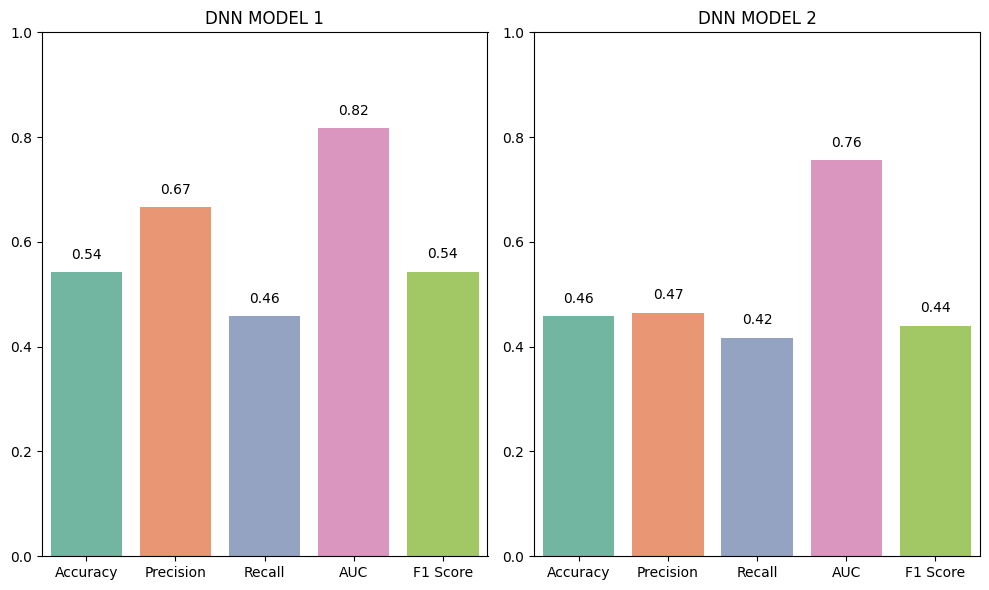

In [ ]:
#average pooling DNN Metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and models
models = ['Accuracy','Precision','Recall','AUC','F1 Score']

accuracy_values = [acc,pre,rec,auc,f1]
accuracy_values2 = [acc2,pre2,rec2,auc2,f2 ]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.title('DNN MODEL 1')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Plot precision
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=accuracy_values2, palette='Set2')
plt.title('DNN MODEL 2')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1


# Add text labels for precision values
for i, v in enumerate(accuracy_values2):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

2/2 [==============================] - 0s 16ms/step


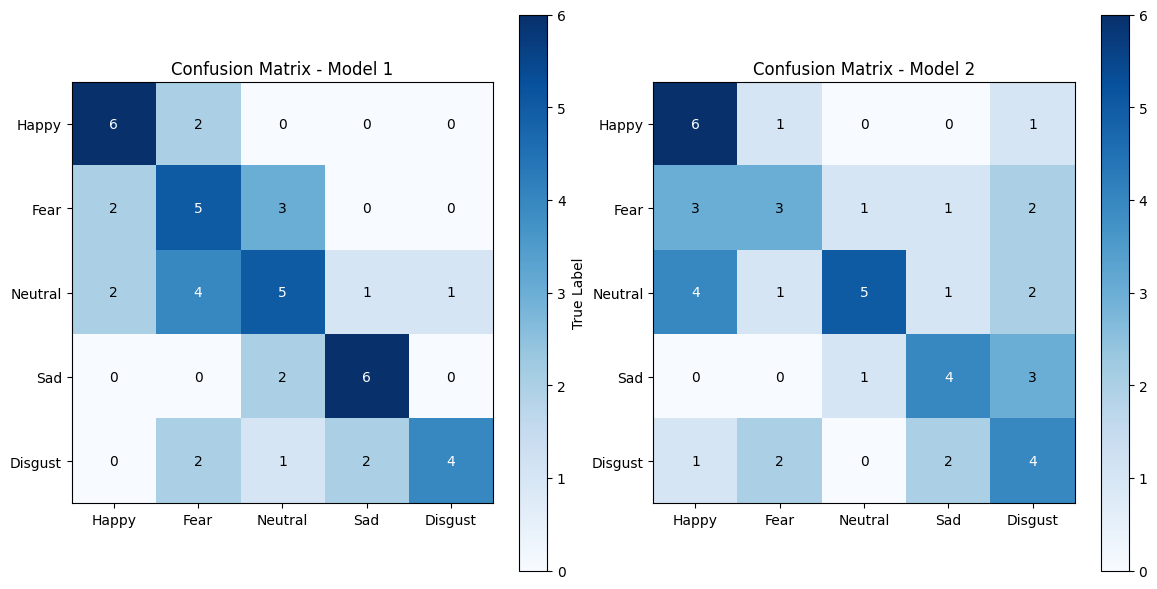

In [ ]:
#average pooling DNN confusion matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):

  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Plot confusion matrix for model 1 on the left
  plt.subplot(1, 2, 1)
  plt.imshow(cm1, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 1")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm1.max() / 2.
  for i in range(len(cm1)):
    for j in range(len(cm1[0])):
      plt.text(j, i, format(cm1[i, j]),  # Display percentages with 2 decimal places
               ha="center", va="center",
               color="white" if cm1[i, j] > thresh else "black")

  # Plot confusion matrix for model 2 on the right
  plt.subplot(1, 2, 2)
  plt.imshow(cm2, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 2")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages (similar to model 1)

  thresh = cm2.max() / 2.
  for i in range(len(cm2)):
    for j in range(len(cm2[0])):
      plt.text(j, i, format(cm2[i, j]),
               ha="center", va="center",
               color="white" if cm2[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes2)

# Create the side-by-side confusion matrix plot
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))), cm2)

